# Auswertung Versuch 233: Fourier-Optik

## Teil 1: Quantitative Beobachtungen am Einzelspalt

### Bestimmung der Spaltbreite

In [1]:
#Benötigte Pakete
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['errorbar.capsize']=2
from scipy.integrate import quad
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema

In [2]:
#Bestimmung der Abstände der Minima 
min_order=np.array([2,3,4,5])
min_pos_left=np.array([953, 863, 785, 702])
min_pos_right=np.array([1283, 1368, 1450, 1530])
min_pos_left_err = np.array([2, 2, 3, 3])
min_pos_right_err = np.array([4, 1, 2, 1])

delta_min=np.abs(min_pos_left-min_pos_right)
delta_min_err=np.sqrt((min_pos_left_err**2+min_pos_right_err**2))

In [3]:
#Eichung der Pixelskala zum Umrechnen des Spaltabstands in Längeneinheiten 
dpx=np.array([690, 533, 365, 217, 740])
dpx_err=9*np.ones(5)
slit_aperture=2*np.array([0.88, 0.69, 0.49, 0.31, 0.94]) #direkt die Messwerte verdoppelt
slit_aperture_err=0.02*np.ones(5)

gauge=slit_aperture/dpx  #Faktor zur Umrechnung von Pixel in mm

gauge_mean=np.mean(gauge)
gauge_syst=np.mean(gauge*np.sqrt((slit_aperture_err/slit_aperture)**2+(dpx_err/dpx)**2))
gauge_stat=np.std(gauge)/np.sqrt(4)


print('Der Umrechnungsfaktor u wurde berechnet zu: ')
print(str(gauge_mean)+' +/- '+str(gauge_syst)+' +/- '+str(gauge_stat))

Der Umrechnungsfaktor u wurde berechnet zu: 
0.00264449154822 +/- 7.57700590172e-05 +/- 5.89577063529e-05


Die Steigung der Fit-Gerade beträgt:
a = 163.911308943 +/- 2.59208657845 pxl
Mit y-Achsenabschnitt:
c = 10.1330348816 +/- 9.49688285444 pxl


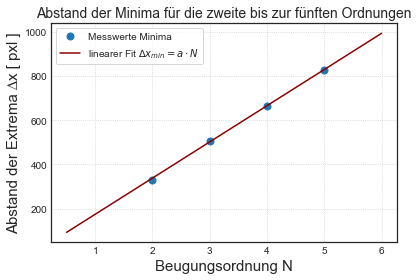

In [4]:
#Definition der linearen Fit-Funktion
def linear_fit(x,a,b):
    return a*x+b
popt,pcov=curve_fit(linear_fit,min_order,delta_min,sigma=delta_min_err)

x_fit=np.linspace(0.5,6,100) #Länge der Fit-Gerade


#Plot der Minima-Abstände mit lin.Fit
plt.plot(min_order,delta_min,linestyle='',marker='o',markersize=7,label='Messwerte Minima')
plt.plot(x_fit,linear_fit(x_fit,*popt),color='darkred',label='linearer Fit $ ∆x_{min} = a \cdot N $')

#Fehlerbalken nicht notwendig, da sie sowieso nicht sichtbar wären.

#Plot-Parameter
plt.xlabel('Beugungsordnung N',size=15)
plt.ylabel('Abstand der Extrema ∆x [ pxl ]',size=15)
plt.title('Abstand der Minima für die zweite bis zur fünften Ordnungen',size=14)
plt.grid(ls='dotted')
plt.legend(frameon=True)


#Abspeichern des Diagramms
plt.tight_layout()
plt.savefig(r'C:\Users\Quirinus\Documents\GitHub\Praktikum\Praktikum\233 - Fourieroptik\Diagramme\Spaltweite.pdf',format='PDF')

a=popt[0]
a_err=pcov[0,0]**0.5

print('Die Steigung der Fit-Gerade beträgt:')
print( 'a = ' + str(a) + ' +/- ' + str(a_err) + ' pxl')
print('Mit y-Achsenabschnitt:')
print('c = '+ str(popt[1])+ ' +/- ' + str(pcov[1,1]**0.5) + ' pxl')

In [5]:
#Umrechnung der Spaltbreite in mm
a_prime= gauge_mean*a

a_prime_syst=np.sqrt((gauge_syst)**2+(a_err*gauge_mean)**2)
a_prime_stat=np.sqrt((gauge_stat)**2+(a_err*gauge_mean)**2)

a_prime_mean=np.mean(a_prime)
a_prime_mean_syst=np.sqrt((gauge_mean*pcov[0,0]**0.5)**2+(popt[0]*gauge_syst)**2)
a_prime_mean_stat=np.sqrt((gauge_mean*pcov[0,0]**0.5)**2+(popt[0]*gauge_stat)**2)

print('Mit der Eichung der Skala erhalten wir die Steigung a in mm/order:')
print( 'a_prime = ' + str(a_prime_mean) + ' +/- ' + str(a_prime_mean_syst) + ' +/- ' + str(a_prime_mean_stat)+ ' mm/order')



Mit der Eichung der Skala erhalten wir die Steigung a in mm/order:
a_prime = 0.433462071156 +/- 0.0141856730473 +/- 0.0118480933226 mm/order


In [6]:
#Bestimmung der Spaltbreite aus der Steigung des Fits (Herleitung in Auswertung)
wavelength=635e-9
f1= 80e-3 

b=2*wavelength*f1/(a_prime_mean*1e-3)
b_syst=b*(a_prime_mean_syst/a_prime_mean)
b_stat=b*(a_prime_mean_stat/a_prime_mean)

print('Aus der Steigung von vorigem Diagramm erhalten wir:')
print('b = '+str(b)+ ' +/- '+str(b_syst)+ ' +/- '+str(b_stat)+ ' m')

Aus der Steigung von vorigem Diagramm erhalten wir:
b = 0.000234391903608 +/- 7.67081396682e-06 +/- 6.40678235264e-06 m


Die Differenz der jeweiligen Maxima beträgt:
∆max =      [235 405 575 741 915]
mit Fehler: [  6.70820393  10.09950494   4.35889894   3.31662479   5.09901951]

Wir erhalten die den Maxima zugeordneten Beugungsordnungen aus dem Fit:
N =         [ 1.37188194  2.4090282   3.44617445  4.45891726  5.52046696]
mit Fehler: [ 0.07417908  0.09276186  0.08386972  0.0934798   0.10929796]

Der Vergleich mit den theoretischen Werten (1.5,2.5,...) liefert:
∆N =        [ 0.05811806  0.0409718   0.02382555  0.03108274  0.06953304]
mit Fehler: [ 0.07417908  0.09276186  0.08386972  0.0934798   0.10929796]


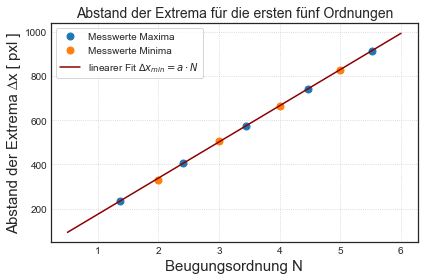

In [7]:
#Bestimmung der Abstände der Maxima
max_pos_left=np.array([998, 913, 830, 743, 658])
max_pos_right=np.array([1233, 1318, 1405, 1484, 1573])
max_pos_left_err = np.array([5, 10, 3, 3, 4])
max_pos_right_err = np.array([20, 2, 10, 2, 10])

#Abstände der jeweiligen Beugungsordnungen
delta_max=np.abs(max_pos_left-max_pos_right)
delta_max_err=np.sqrt((max_pos_left_err**2+max_pos_right_err**1))

print('Die Differenz der jeweiligen Maxima beträgt:')
print('∆max =      '+str(delta_max))
print('mit Fehler: '+str(delta_max_err))
print()

#Position der Maxima mit Hilfe von vorigem Diagramm
n_max_calc=(delta_max-popt[1])/popt[0]
n_max_calc_err=np.sqrt((delta_max_err/popt[0])**2+(pcov[1,1]**0.5/popt[0])**2+((delta_max-popt[1])*pcov[0,0]**0.5/popt[0]**2)**2)
n_max_theory=np.array([1.43, 2.45, 3.47, 4.49, 5.59])
#Differenz Messwert-Theorie
diff_n_max=np.abs(n_max_theory-n_max_calc)

print('Wir erhalten die den Maxima zugeordneten Beugungsordnungen aus dem Fit:')
print('N =         ' + str(n_max_calc))
print ('mit Fehler: ' + str(n_max_calc_err))
print()

#Plot der Maxima-Abstände 
plt.plot(n_max_calc,delta_max,linestyle='',marker='o',markersize=7,label='Messwerte Maxima')
plt.plot(min_order,delta_min,linestyle='',marker='o',markersize=7,label='Messwerte Minima')
plt.plot(x_fit,linear_fit(x_fit,*popt),color='darkred',label='linearer Fit $ ∆x_{min} = a \cdot N $')


#Plot-Parameter
plt.xlabel('Beugungsordnung N',size=15)
plt.ylabel('Abstand der Extrema ∆x [ pxl ]',size=15)
plt.title('Abstand der Extrema für die ersten fünf Ordnungen',size=14)
plt.grid(ls='dotted')
plt.legend(frameon=True)

#Abspeichern des Diagramms
plt.tight_layout()
plt.savefig(r'C:\Users\Quirinus\Documents\GitHub\Praktikum\Praktikum\233 - Fourieroptik\Diagramme\Abstände Extrema.pdf',format='PDF')

print('Der Vergleich mit den theoretischen Werten (1.5,2.5,...) liefert:')
print('∆N =        ' + str(diff_n_max))
print ('mit Fehler: ' + str(n_max_calc_err))


In [8]:
#Bestimmung der Minimaordnung aus der Äquidistanzannahme

#Setze den Abstand des berechneten ersten Minimums als Eichung fest und vergleiche die Differenzen der höheren Ordnungen damit
min_theo=[]
min_theo_err=[]
for i in range(1,5):
    min_theo.append(2*delta_min[i-1]/delta_min[0])
    min_theo_err.append(min_theo[i-1]*np.sqrt((delta_min_err[i-1]/delta_min[i-1])**2+(delta_min_err[0]/delta_min[0])**2))

print('Wir erhalten die den Minima zugeordneten Beugungsordnungen mittels der Äquidistanzannahme:')
print('N =     ' + str(min_theo))
print ('Fehler: ' + str(min_theo_err))

Wir erhalten die den Minima zugeordneten Beugungsordnungen mittels der Äquidistanzannahme:
N =     [2.0, 3.0606060606060606, 4.0303030303030303, 5.0181818181818185]
Fehler: [0.038330638305071267, 0.043634910451852055, 0.058827450780244366, 0.070655008082842335]


### Vergleich der relativen Intensitäten aus den beide Messreihen

In [9]:
#zunächst einmal muss das Verhältnis aus der ersten Messung bestimmt werden,da bei der zweiten das 0. Max. übersteuert

#für den Fehler der counts gilt hier:
intensity_err=6

max1_intensity_left1=316
ug_left1=87

max1_intensity_right1=298
ug_right1=87


max0_intensity1=3782
max0_intensity1_err = 7

#Abziehen des Untergrunds durch Mittlung des linken und des rechten Untergrundes
max0_1_corr = (max0_intensity1-(ug_left1+ug_right1)/2)
max0_1_corr_err = np.sqrt((max0_intensity1_err/max0_intensity1)**2+(intensity_err/ug_left1/2)**2+(intensity_err/ug_right1/2)**2)

#Abziehen des linken Untergrunds
max1_left1_corr=max1_intensity_left1-ug_left1
max1_left1_corr_err=np.sqrt(2)*intensity_err

#Abziehen des rechten Untergrunds
max1_right1_corr=max1_intensity_right1-ug_right1
max1_right1_corr_err=np.sqrt(2)*intensity_err

#Verhältnis vom nullten zum ersten Maximum
prob_max1_max0_left =max1_left1_corr/max0_1_corr
prob_left_err =prob_max1_max0_left*np.sqrt((max1_left1_corr_err/max1_left1_corr)**2+(max0_1_corr_err/max0_1_corr)**2)

prob_max1_max0_right = max1_right1_corr/max0_1_corr
prob_right_err= prob_max1_max0_right*np.sqrt((max1_right1_corr_err/max1_right1_corr)**2+(max0_1_corr_err/max0_1_corr)**2)

print('Das Verhältnis vom 1.Nebenmaximum links zum Hauptmaximum beträgt:')
print(str(prob_max1_max0_left) + ' +/- ' + str(prob_left_err))
print()
print('Das Verhältnis vom 1.Nebenmaximum rechts zum Hauptmaximum beträgt:')
print(str(prob_max1_max0_right) + ' +/- ' + str(prob_right_err))
print()



Das Verhältnis vom 1.Nebenmaximum links zum Hauptmaximum beträgt:
0.06197564276048714 +/- 0.00229642270995

Das Verhältnis vom 1.Nebenmaximum rechts zum Hauptmaximum beträgt:
0.0571041948579161 +/- 0.00229642268792



In [10]:
#Ab hier werden die Messdaten der zweiten Messreihe verwendet
max_intensity_left2=np.array([1345, 568, 338, 223, 180])
max_intensity_left2_err = np.array([5, 10, 3, 3, 4])
ug_left2=102*np.ones(5)
ug_left2_err = 3*np.ones(5)

max_intensity_left2_corr=max_intensity_left2-ug_left2
max_intensity_left2_corr_err=np.sqrt(ug_left2_err**2+max_intensity_left2_err**2)

max_intensity_right2=np.array([1370, 524, 281, 180, 135])
max_intensity_right2_err = np.array([20, 2, 10, 2, 10])
ug_right2=95*np.ones(5)
ug_right2_err = 5*np.ones(5)

max_intensity_right2_corr=max_intensity_right2-ug_right2
max_intensity_right2_corr_err=np.sqrt(max_intensity_right2_err**2+ug_right2_err**2)

#Jetzt können wir anhand des Ergebnisses die Werte für die zweite Messreihe durch Umrechnung bestimmen
max0_intesity2_left=(1/prob_max1_max0_left)*max_intensity_left2_corr[0]
max0_intesity2_left_err=max0_intesity2_left*np.sqrt((prob_left_err/prob_max1_max0_left)**2+(intensity_err/max_intensity_left2_corr[0])**2)

max0_intesity2_right=(1/prob_max1_max0_right)*max_intensity_right2_corr[0]
max0_intesity2_right_err=max0_intesity2_right*np.sqrt((prob_right_err/prob_max1_max0_right)**2+(intensity_err/max_intensity_right2_corr[0])**2)

max0_intensity2_tot=(max0_intesity2_left+max0_intesity2_right)/2
max0_intensity2_tot_err=max0_intensity2_tot*np.sqrt((max0_intesity2_left_err/max0_intesity2_left)**2+(max0_intesity2_left_err/max0_intesity2_right)**2)

print('Nach Umrechnung durch das Verhältnis aus der ersten Messreihe hätte das nullte Max. die Intensität: ')
print('I_max0 = ' + str(max0_intensity2_tot) + ' +/- ' + str(max0_intensity2_tot_err))
print()

#Jetzt können wir das Verhältnis zum nullten Maximum trotz der Übersteuerung ausrechnen!
max0_2=max0_intensity2_tot*np.ones(5)

prob_max_max0_left=max_intensity_left2_corr/max0_intensity2_tot
prob_max_max0_left_err=prob_max_max0_left*np.sqrt((max_intensity_left2_corr_err/max_intensity_left2_corr)**2+(max0_intensity2_tot_err/max0_intensity2_tot)**2)

prob_max_max0_right=max_intensity_right2_corr/max0_intensity2_tot
prob_max_max0_right_err=prob_max_max0_right*np.sqrt((max_intensity_right2_corr_err/max_intensity_right2_corr)**2+(max0_intensity2_tot_err/max0_intensity2_tot)**2)

print('Im Verhältnis zum berechnenten Maximum ergeben sich damit die folgenden Verhältnisse:')
print('linke Maxima: ' + str(prob_max_max0_left))
print('Fehler links: ' + str(prob_max_max0_left_err))
print()
print('rechte Maxima: ' + str(prob_max_max0_right))
print('Fehler rechts: ' + str(prob_max_max0_right_err))



Nach Umrechnung durch das Verhältnis aus der ersten Messreihe hätte das nullte Max. die Intensität: 
I_max0 = 21191.9365053 +/- 1064.44160435

Im Verhältnis zum berechnenten Maximum ergeben sich damit die folgenden Verhältnisse:
linke Maxima: [ 0.05865438  0.0219895   0.01113631  0.00570972  0.00368065]
Fehler links: [ 0.00295895  0.00120939  0.00059411  0.00034976  0.00029974]

rechte Maxima: [ 0.06016439  0.02024355  0.00877692  0.00401096  0.00188751]
Fehler rechts: [ 0.00317469  0.00104808  0.00068752  0.00032429  0.00053603]


### Berechung der theoretischen Intensitätsverhältnisse

Die theoretischen Werte für die Verhältnisse Nebenmaximum/Hauptmaximum ergeben sich zu:
[ 0.04719045  0.01648003  0.00834029  0.00502872  0.00336073]


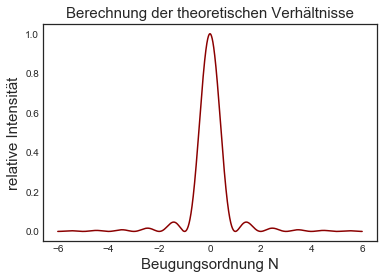

In [11]:
def beugung_spalt(x):
    return np.sinc(x)**2
a=5
#kleinere Schrittweite für präzisere Berechnung der Maxima, ungerade Anzahl damit nur einmal das nullte berechnet wird
x=np.linspace(-(a+1),a+1,200001)

#Berechnung der relativen Maxima
slit_theory=argrelextrema(beugung_spalt(x), np.greater_equal, order = 1) 
max_theory=np.array(beugung_spalt(x[slit_theory]))
max_theory_sliced=max_theory[4::-1]

print('Die theoretischen Werte für die Verhältnisse Nebenmaximum/Hauptmaximum ergeben sich zu:')
print(max_theory_sliced)

plt.plot(x,beugung_spalt(x),color='darkred')
plt.title('Berechnung der theoretischen Verhältnisse',size=15)
plt.xlabel('Beugungsordnung N',size=15)
plt.ylabel('relative Intensität',size=15)


### Vergleich der Theorie-Werte mit unseren Messergebnissen

In [12]:
#Wir gehen bei den Theorie-Werten von einer fehlerfreien Bestimmung aus

#linke Seite
diff_max_theory_left=np.abs(max_theory_sliced-prob_max_max0_left)

#rechte Seite 
diff_max_theory_right=np.abs(max_theory_sliced-prob_max_max0_right)

print('Der Vergleich liefert für die linke Seite:')
print(diff_max_theory_left)
print('mit Fehler:')
print(prob_max_max0_left_err)
print()
print('Der Vergleich liefert für die rechte Seite:')
print(diff_max_theory_right)
print('mit Fehler:')
print(prob_max_max0_right_err)
print()
print('Damit sind einige Wertepaare signifikant verschieden.')

Der Vergleich liefert für die linke Seite:
[ 0.01146394  0.00550947  0.00279602  0.000681    0.00031992]
mit Fehler:
[ 0.00295895  0.00120939  0.00059411  0.00034976  0.00029974]

Der Vergleich liefert für die rechte Seite:
[ 0.01297394  0.00376352  0.00043663  0.00101776  0.00147322]
mit Fehler:
[ 0.00317469  0.00104808  0.00068752  0.00032429  0.00053603]

Damit sind einige Wertepaare signifikant verschieden.


## Teil 2: Beugungsstruktur des Doppelspaltes

In [13]:
#Berechnung des Verhältnisses von Spaltabstand & Spaltbreite aus Teilaufgabe 4

# Breite der Spalte in Px

width_left=144
width_right=145

width_err=8

width_mean=(width_left+width_right)/2
width_mean_err=np.sqrt(2)*width_err/2


print('Die Spaltbreite d der beiden einzelnen Spalte beträgt(gemittelt):')
print('d = '+str(width_mean)+' +/- '+str(width_mean_err)+' pxl')
print()

#Berechnung des Spaltabstandes Spaltbreite und Abstand (Ende zu Ende)

end_to_end = 186
end_to_end_err = 8
 
mid_left =width_left/2
mid_left_err = width_err/2

mid_right =width_right/2
mid_right_err = width_err/2

diff_mid = mid_left + mid_right + end_to_end
diff_mid_err = np.sqrt(mid_left_err**2+mid_right_err**2 + end_to_end_err**2)

print('Der Spaltabstand g des Doppelspalts beträgt: ')
print('g = '+str(diff_mid)+' +/- '+ str(diff_mid_err)+ ' pxl')
print()

#Verhältnis des Spaltabstands zur Spaltbreite

prob_gd = diff_mid/width_mean
prob_gd_err = prob_gd*np.sqrt((diff_mid_err/diff_mid)**2+(width_mean_err/width_mean)**2)

print('Demnach ergibt sich für das Verhältnis v aus Spaltabstand und Spaltbreite:')
print('v = '+str(prob_gd)+' +/- '+str(prob_gd_err))


Die Spaltbreite d der beiden einzelnen Spalte beträgt(gemittelt):
d = 144.5 +/- 5.65685424949 pxl

Der Spaltabstand g des Doppelspalts beträgt: 
g = 330.5 +/- 9.79795897113 pxl

Demnach ergibt sich für das Verhältnis v aus Spaltabstand und Spaltbreite:
v = 2.28719723183391 +/- 0.112315733292


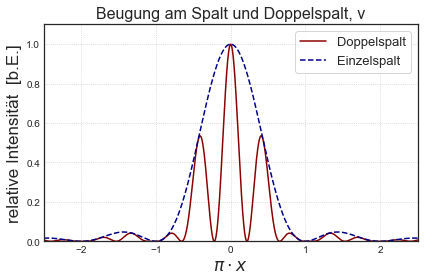

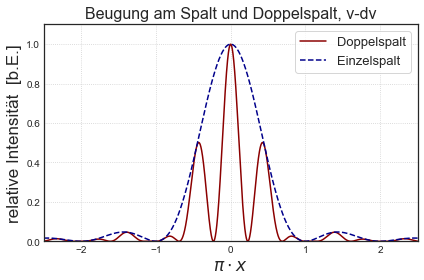

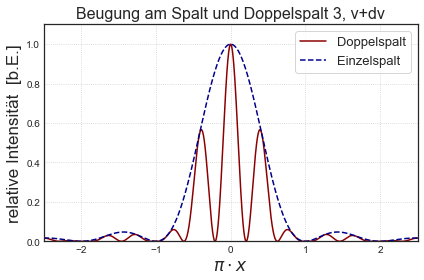

In [14]:
#Bestimmung der Beugungsfunktion des Doppelspalts (Theorie)
v=prob_gd
#Randwerte des 1-Sigma_intervalls
v2=prob_gd-prob_gd_err
v3=prob_gd+prob_gd_err

def beugung_doppelspalt(x, v):
    return np.sinc(x)**2*np.cos(np.pi*v*x)**2

#zum Vergleich soll noch das Bild des zugehörigen Einzelspalt ins Diagramm geplottet werden.

plt.figure(1)
plt.plot(x,beugung_doppelspalt(x, v),color='darkred',label='Doppelspalt')
plt.plot(x,beugung_spalt(x),color='darkblue',label='Einzelspalt',linestyle='--')
plt.title('Beugung am Spalt und Doppelspalt, v',size=16)
plt.xlabel('$\pi \cdot x$',size=17)
plt.ylabel('relative Intensität  [b.E.]',size=17)
plt.grid(ls='dotted')
plt.ylim(0,1.1)
plt.xlim(-2.5,2.5)
plt.legend(frameon=True,fontsize=13)
plt.tight_layout()
plt.savefig(r'C:\Users\Quirinus\Documents\GitHub\Praktikum\Praktikum\233 - Fourieroptik\Diagramme\Beugungen.pdf',format='PDF')


plt.figure(2)
plt.plot(x,beugung_doppelspalt(x, v2),color='darkred',label='Doppelspalt')
plt.plot(x,beugung_spalt(x),color='darkblue',label='Einzelspalt',linestyle='--')
plt.title('Beugung am Spalt und Doppelspalt, v-dv',size=16)
plt.xlabel('$\pi \cdot x$',size=17)
plt.ylabel('relative Intensität  [b.E.]',size=17)
plt.grid(ls='dotted')
plt.ylim(0,1.1)
plt.xlim(-2.5,2.5)
plt.legend(frameon=True,fontsize=13)
plt.tight_layout()
plt.savefig(r'C:\Users\Quirinus\Documents\GitHub\Praktikum\Praktikum\233 - Fourieroptik\Diagramme\Beugungen2.pdf',format='PDF')


plt.figure(3)
plt.plot(x,beugung_doppelspalt(x, v3),color='darkred',label='Doppelspalt')
plt.plot(x,beugung_spalt(x),color='darkblue',label='Einzelspalt',linestyle='--')
plt.title('Beugung am Spalt und Doppelspalt 3, v+dv',size=16)
plt.xlabel('$\pi \cdot x$',size=17)
plt.ylabel('relative Intensität  [b.E.]',size=17)
plt.grid(ls='dotted')
plt.ylim(0,1.1)
plt.xlim(-2.5,2.5)
plt.legend(frameon=True,fontsize=13)
plt.tight_layout()
plt.savefig(r'C:\Users\Quirinus\Documents\GitHub\Praktikum\Praktikum\233 - Fourieroptik\Diagramme\Beugungen3.pdf',format='PDF')


### Vergleich der Theorie-Kurve mit unseren Messwerten

In [15]:
#Wir berechnen auch hier die Verhältnisse der Intensitätem der jeweiligen Maxima mit dem Hauptmaximum

#Messwerte 
max2_0= 3717
max2_0_err = 5
max2_left=np.array([2041, 257, 210, 189]) #vom 1. bis zum 4. Nebenmaximum
max2_left_err = np.array([3, 6, 6, 9])
ug_left2=86*np.ones(4)
ug_left2_err = 4*np.ones(4)

corr_err_left=np.sqrt(max2_left_err**2 + ug_left2_err**2) #Fehler der Differenz
max2_left_corr=max2_left-ug_left2


max2_right=np.array([2078, 291, 203, 178]) #vom 1. bis zum 4. Nebenmaximum
max2_right_err = np.array([3, 7, 6, 8])
ug_right2=89*np.ones(4)
ug_right2_err = 3*np.ones(4)

max2_right_corr=max2_right-ug_right2
corr_err_right = np.sqrt(max2_right_err**2 + ug_right2_err**2)

max2_0_corr = max2_0 - (86 + 89)/2
max2_0_corr_err = np.sqrt(max2_0_err**2 + 2**2 + 1.5**2)

prob2_max_max0_left=max2_left_corr/max2_0_corr
prob2_max_max0_left_err=prob2_max_max0_left*np.sqrt((corr_err_left/max2_left_corr)**2+(max2_0_corr_err/max2_0_corr)**2)

prob2_max_max0_right=max2_right_corr/max2_0_corr
prob2_max_max0_right_err=prob2_max_max0_right*np.sqrt((corr_err_right/max2_right_corr)**2+(max2_0_corr_err/max2_0_corr)**2)

print('Der Vergleich der Intensitäten unserer Messungen liefert die nochfolgenden Verhältnisse:')
print('linke Seite: '+str(prob2_max_max0_left))
print('mit Fehler:  '+str(prob2_max_max0_left_err))
print()
print('rechte Seite: '+str(prob2_max_max0_right))
print('mit Fehler:   '+str(prob2_max_max0_right_err))
print()

#Theorie-Kurve

doubleslit_theory = argrelextrema(beugung_doppelspalt(x, v), np.greater_equal, order = 1) 
      
max2_theory1=np.array(beugung_doppelspalt(x[doubleslit_theory], v))
max_mask = (max2_theory1 > 0.009)
max2_theory = max2_theory1[max_mask]
max2_theory_sliced=max2_theory[6:10]

# Fehler der Theorie
doubleslit_theory_err1 = argrelextrema(beugung_doppelspalt(x, v2), np.greater_equal, order = 1) 
doubleslit_theory_err2 = argrelextrema(beugung_doppelspalt(x, v3), np.greater_equal, order = 1) 

max2_theory1_err1=np.array(beugung_doppelspalt(x[doubleslit_theory], v2))
max2_theory1_err2=np.array(beugung_doppelspalt(x[doubleslit_theory], v3))
max_mask1 = (max2_theory1_err1 > 0.005)
max_mask2 = (max2_theory1_err2 > 0.005)
max2_theory2_err1 = (max2_theory1_err1[max_mask1])[6:10]
max2_theory2_err2 = (max2_theory1_err2[max_mask2])[6:10]
max2_theory3_err1 = np.abs(max2_theory2_err1 - max2_theory_sliced)
max2_theory3_err2 = np.abs(max2_theory2_err2 - max2_theory_sliced)
max_theory_err = []
for i in range(len(max2_theory_sliced)):
    if max2_theory3_err1[i] <= max2_theory3_err2[i]:
        max_theory_err.append(max2_theory3_err2[i])
    else:
        max_theory_err.append(max2_theory3_err1[i])
doubleslit_theory_err = np.array(max_theory_err)
    
print('Die Theorie-Werte sind: '+str(max2_theory_sliced))
print('+-', doubleslit_theory_err)

Der Vergleich der Intensitäten unserer Messungen liefert die nochfolgenden Verhältnisse:
linke Seite: [ 0.53864169  0.04711393  0.03416449  0.02837856]
mit Fehler:  [ 0.00160812  0.00198813  0.0019875   0.00271391]

rechte Seite: [ 0.54800937  0.05565505  0.03140929  0.02452128]
mit Fehler:   [ 0.00144181  0.00210005  0.00184888  0.00235435]

Die Theorie-Werte sind: [ 0.53493756  0.04120571  0.0417182   0.02024765]
+- [ 0.04264206  0.01728223  0.01342029  0.01284791]


### Vergleich der Theorie-Werte mit unseren Messergebnissen

In [16]:
#Wir gehen bei den Theorie-Werten erneut von einer fehlerfreien Bestimmung aus.

#linke Seite
diff2_max_theory_left=np.abs(prob2_max_max0_left-max2_theory_sliced)

#rechte Seite 
diff2_max_theory_right=np.abs(prob2_max_max0_right-max2_theory_sliced)

print('Der Vergleich liefert für die linke Seite:')
print(diff2_max_theory_left)
print('mit Fehler:')
print(np.sqrt(prob2_max_max0_left_err**2+doubleslit_theory_err**2))
print()
print('Der Vergleich liefert für die rechte Seite:')
print(diff2_max_theory_right)
print('mit Fehler:')
print(np.sqrt(prob2_max_max0_right_err**2+doubleslit_theory_err**2))
print()
print('Damit sind keine Wertepaare signifikant verschieden!')

Der Vergleich liefert für die linke Seite:
[ 0.00370412  0.00590822  0.00755372  0.00813092]
mit Fehler:
[ 0.04267237  0.01739621  0.01356666  0.01313141]

Der Vergleich liefert für die rechte Seite:
[ 0.01307181  0.01444934  0.01030892  0.00427364]
mit Fehler:
[ 0.04266643  0.01740936  0.01354705  0.01306184]

Damit sind keine Wertepaare signifikant verschieden!


### Vergleich der relativen Intensitäten der Nebenmaxima zwischen dem ersten Minimum der Spaltfunktion

In [17]:
#Das betrifft jeweils die ersten beiden Nebenmaxima. Die Daten werden aus dem vorherigen Code übernommen.

#Differenzbildung
diff_max_under_single_left=np.abs(max2_theory_sliced[0:2]-prob2_max_max0_left[0:2])
diff_max_under_single_right=np.abs(max2_theory_sliced[0:2]-prob2_max_max0_right[0:2])

print('Der Vergleich liefert für die linke Seite:')
print(diff_max_under_single_left)
print('mit Fehler:')
print(prob2_max_max0_left_err[0:2])
print()
print('Der Vergleich liefert für die rechte Seite:')
print(diff_max_under_single_right)
print('mit Fehler:')
print(prob2_max_max0_right_err[0:2])

Der Vergleich liefert für die linke Seite:
[ 0.00370412  0.00590822]
mit Fehler:
[ 0.00160812  0.00198813]

Der Vergleich liefert für die rechte Seite:
[ 0.01307181  0.01444934]
mit Fehler:
[ 0.00144181  0.00210005]


## Teil 3: Das Objektbild als Fouriersynthese

In [18]:
# Integrand zu Formel 57, Einzelspalt
def spalt(k):
    return d/np.pi*np.sin(k*d/2)/(k*d/2)*np.cos(yi*k)

# Integrand zu 57, Doppelspalt
def doppelspalt(k):
    return d/np.pi*np.cos(k*g/2)*np.sin(k*d/2)/(k*d/2)*np.cos(yi*k)

In [19]:
# Funktion zur berechnung und zum plot des resultierenden Objektbildes

d = b
def picture(
           function, # Integrand
           b,        # Integrationsbereich bezüglich der Nullstellen
           dateiname):
    
    # Definieren der Funktionsvariable
    global n
    global g
    n = b
    
    if function == spalt:
        y = np.linspace(-d, d, 301)
    else:
        y = np.linspace(-g, g, 501)
    
    # Berechnung des Objektbiles
    f_mod = []
    for i in range(len(y)): # numerische Inegration
        global yi 
        yi = y[i]
        result, error = quad(function, 0, 2*np.pi*n/d)
        f_mod.append(result**2)
    f_mod = f_mod/np.max(f_mod)
    #f_mod = np.array(f_mod)
    
    # Lage der Maxima
    max1 = argrelextrema(f_mod, np.greater_equal, order = 1)
    f_max1 = f_mod[max1]
    y_max1 = y[max1]
    max2 = (f_max1 > 0.05)
    f_max = f_max1[max2]
    y_max = y_max1[max2]
    
    # Lage der Maxima
    min1 = argrelextrema(f_mod, np.less_equal, order = 1)
    f_min1 = f_mod[min1]
    y_min1 = y[min1]
    min2 = (f_min1 > 0.05)
    f_min = f_min1[min2]
    y_min = y_min1[min2]
    
    # Plot
    plt.figure(dateiname)
    plt.plot(y, f_mod, color = 'darkorange', linewidth = 0.8)
    plt.plot(y_max, f_max, linestyle ='', marker = 'x', color = 'blue', label = 'Maxima')
    plt.plot(y_min, f_min, linestyle ='', marker = 'x', color = 'darkred', label = 'Minima')
    plt.xlabel('y / d')
    plt.ylabel('Intensität / b. E.')
    plt.title('modifiziertes Objektbild %s' %dateiname)
    plt.ylim((0, 1.1))
    plt.legend(frameon = True)
    plt.savefig(r'C:\Users\Quirinus\Documents\GitHub\Praktikum\Praktikum\233 - Fourieroptik\Diagramme\%s.pdf' %dateiname)
    
    # Ausgabe der Lage der Maxima und Minima
    return y_max, f_max, y_min, f_min
    

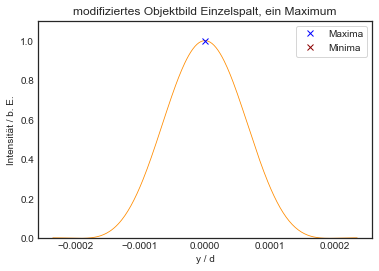

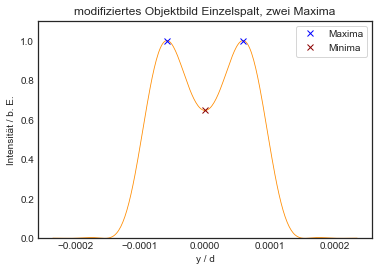

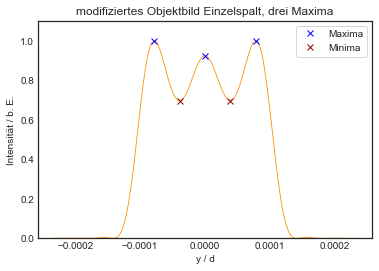

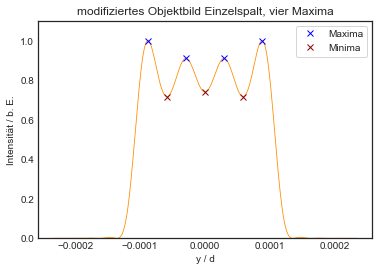

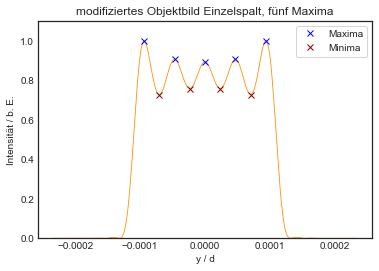

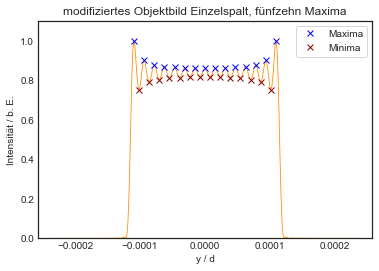

In [20]:
#Plotten der Einzelspaltbilder
maxPos_spalt1, maxInt_spalt1, minPos_spalt1, minInt_spalt1 = picture(spalt, 1, 'Einzelspalt, ein Maximum')
maxPos_spalt2, maxInt_spalt2, minPos_spalt2, minInt_spalt2 = picture(spalt, 2, 'Einzelspalt, zwei Maxima')
maxPos_spalt3, maxInt_spalt3, minPos_spalt3, minInt_spalt3 = picture(spalt, 3, 'Einzelspalt, drei Maxima')
maxPos_spalt4, maxInt_spalt4, minPos_spalt4, minInt_spalt4 = picture(spalt, 4, 'Einzelspalt, vier Maxima')
maxPos_spalt5, maxInt_spalt5, minPos_spalt5, minInt_spalt5 = picture(spalt, 5, 'Einzelspalt, fünf Maxima')
maxPos_spalt15, maxInt_spalt15, minPos_spalt15, minInt_spalt15 = picture(spalt, 15, 'Einzelspalt, fünfzehn Maxima')

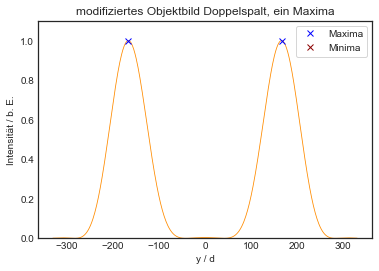

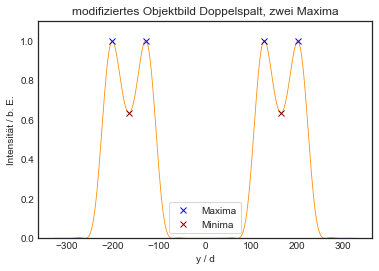

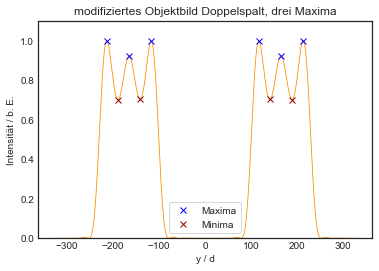

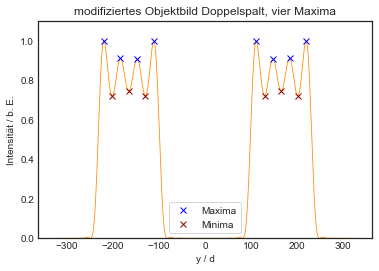

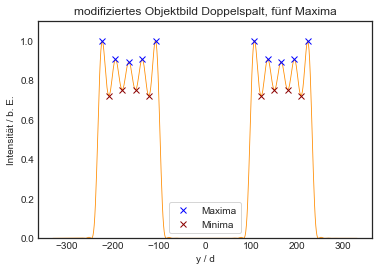

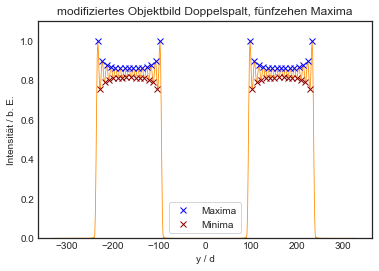

In [21]:
#Doppelspalt
d=width_mean
g=diff_mid

#Plotten der Doppelspaltbilder mit zuver berechnetem d und g
maxPos_dspalt1, maxInt_dspalt1, minPos_dspalt1, minInt_dspalt1 = picture(doppelspalt, 1, 'Doppelspalt, ein Maxima')
maxPos_dspalt2, maxInt_dspalt2, minPos_dspalt2, minInt_dspalt2 = picture(doppelspalt, 2, 'Doppelspalt, zwei Maxima')
maxPos_dspalt3, maxInt_dspalt3, minPos_dspalt3, minInt_dspalt3 = picture(doppelspalt, 3, 'Doppelspalt, drei Maxima')
maxPos_dspalt4, maxInt_dspalt4, minPos_dspalt4, minInt_dspalt4 = picture(doppelspalt, 4, 'Doppelspalt, vier Maxima')
maxPos_dspalt5, maxInt_dspalt5, minPos_dspalt5, minInt_dspalt5 = picture(doppelspalt, 5, 'Doppelspalt, fünf Maxima')
maxPos_dspalt15, maxInt_dspalt15, minPos_dspalt15, minInt_dspalt15 = picture(doppelspalt, 15, 'Doppelspalt, fünfzehen Maxima')

In [22]:
# Funktion zum Bestimmen der Extrema
def distance(pos):
    Pos = []
    if len(pos) < 2:
        True
    else:
        for i in range(len(pos) - 1):
            Pos.append(pos[i+1] - pos[i])
    return np.round(Pos, 1)

def distance_err(pos_err):
    Pos_err = []
    if len(pos_err) < 2:
        True
    else:
        for i in range(len(pos_err) - 1):
            Pos_err.append(np.sqrt(pos_err[i+1]**2 + pos_err[i]**2))
    return np.round(Pos_err, 1)

In [23]:
# Bestimmen der theoretischen Abstände der Maxima und Minima
dist_spalt1_max = distance(maxPos_spalt1) 
dist_spalt2_max = distance(maxPos_spalt2) 
dist_spalt3_max = distance(maxPos_spalt3) 
dist_spalt1_min = distance(minPos_spalt1) 
dist_spalt2_min = distance(minPos_spalt2) 
dist_spalt3_min = distance(minPos_spalt3) 

# selbiges für Experimentelle Werte, mit Fehlern
maxPos_spalt1_ex = np.array([1138])
maxPos_spalt2_ex = np.array([1101, 1171])
maxPos_spalt3_ex = np.array([1090, 1138, 1183])
maxPos_spalt1_ex_err = np.array([4])
maxPos_spalt2_ex_err = np.array([5, 5])
maxPos_spalt3_ex_err = np.array([6, 4, 5])

minPos_spalt1_ex = np.array([])
minPos_spalt2_ex = np.array([1090])
minPos_spalt3_ex = np.array([1112, 1160])
minPos_spalt1_ex_err = np.array([])
minPos_spalt2_ex_err = np.array([5])
minPos_spalt3_ex_err = np.array([6, 5])

# Bestimmen der theoretischen Abstände der Maxima und Minima
dist_spalt1_max_ex = distance(maxPos_spalt1_ex) 
dist_spalt2_max_ex = distance(maxPos_spalt2_ex) 
dist_spalt3_max_ex = distance(maxPos_spalt3_ex)
dist_spalt1_max_ex_err = distance_err(maxPos_spalt1_ex_err) 
dist_spalt2_max_ex_err = distance_err(maxPos_spalt2_ex_err) 
dist_spalt3_max_ex_err = distance_err(maxPos_spalt3_ex_err)

dist_spalt1_min_ex = distance(minPos_spalt1_ex) 
dist_spalt2_min_ex = distance(minPos_spalt2_ex) 
dist_spalt3_min_ex = distance(minPos_spalt3_ex)
dist_spalt1_min_ex_err = distance_err(minPos_spalt1_ex_err) 
dist_spalt2_min_ex_err = distance_err(minPos_spalt2_ex_err) 
dist_spalt3_min_ex_err = distance_err(minPos_spalt3_ex_err)

In [24]:
#Theoretische Abstände der Maxima und Minima für den Doppelsplalt, 15 Maxima
dist_dspalt15_max = distance(maxPos_dspalt15[15:]) 
dist_dspalt15_min = distance(minPos_dspalt15[15:]) 

# selbiges für Experimentelle Werte, mit Fehlern
maxPos_dspalt15_ex = np.array([808.5, 816.3, 826.1, 836.3, 844.5, 855.0, 864.0, 873.6, 883.1, 892.0, 902.3, 910.8, 921.0, 929.9, 941.0])
maxPos_dspalt15_ex_err = np.array([0.5, 0.4, 1.0, 0.2, 0.6, 1.0, 1.0, 0.6, 0.8, 1.0, 0.4, 0.6, 0.4, 0.6, 1.0])

minPos_dspalt15_ex = np.array([812.0, 824.6, 831.0, 840.0, 859.2, 869.2, 879.0, 883.0, 898.3, 907.0, 914.3, 925.2, 935.3])
minPos_dspalt15_ex_err = np.array([1.0, 0.6, 1.0, 0.7, 1.0, 0.4, 0.6, 1.0, 1.0, 0.7, 1.0, 0.6, 0.6, 0.6])

# Bestimmen der theoretischen Abstände der Maxima und Minima
dist_dspalt15_max_ex = distance(maxPos_dspalt15_ex)
dist_dspalt15_max_ex_err = distance_err(maxPos_dspalt15_ex_err)

dist_dspalt15_min_ex = distance(minPos_dspalt15_ex)
dist_dspalt15_min_ex_err = distance_err(minPos_dspalt15_ex_err)

### Vergleich des Doppelspaltes, Intensitäten, 1. bis 3. Beugungsordnung

In [25]:
# Berechnung der theoretischen Intensitätsverhältnis

def intRatio(
             b,        # Integrationsbereich bezüglich der Nullstellen
             function = doppelspalt, # Integrand
             ):
    
    # Definieren der Funktionsvariable
    global n
    global g
    n = b
    
    y = np.linspace(-g, g, 501)
    
    # Berechnung des Objektbiles
    f_mod = []
    for i in range(len(y)): # numerische Inegration
        global yi 
        yi = y[i]
        result, error = quad(function, 0, 2*np.pi*n/d)
        f_mod.append(result**2)
    f_mod = np.array(f_mod)
    
    # Bestimmen der Maxima
    max1 = argrelextrema(f_mod, np.greater_equal, order = 1)
    f_max1 = f_mod[max1]
    y_max1 = y[max1]
    max2 = (f_max1 > 0.05)
    f_max = f_max1[max2]
    y_max = y_max1[max2]
    
    # Bestimmen der Maxima
    min1 = argrelextrema(f_mod, np.less_equal, order = 1)
    f_min1 = f_mod[min1]
    y_min1 = y[min1]
    min2 = (f_min1 > 0.005)
    f_min = f_min1[min2]
    y_min = y_min1[min2]

    # Ausgabe der Lage der Maxima und Minima
    return f_max, f_min

d=width_mean
g=diff_mid
    
dspalt1_max, dspalt1_min = intRatio(b=1)
dspalt2_max, dspalt2_min = intRatio(b=2)
dspalt3_max, dspalt3_min = intRatio(b=3)

i0 = dspalt1_max[0] # Normierung
print('Die theoretischen Intensitätsverhältnisse sind:')
print ('Maxima, 2. Beugungsord.', np.round(dspalt2_max/i0, 3), 
       'Minima, 2. Beugungsord.', np.round(dspalt2_min/i0, 3), 
       'Maxima, 3. Beugungsord.', np.round(dspalt3_max/i0, 3), 
       'Minima, 3. Beugungsord.', np.round(dspalt3_min/i0, 3))

Die theoretischen Intensitätsverhältnisse sind:
Maxima, 2. Beugungsord. [ 0.911  0.914  0.914  0.911] Minima, 2. Beugungsord. [ 0.579  0.579] Maxima, 3. Beugungsord. [ 0.881  0.813  0.879  0.879  0.813  0.881] Minima, 3. Beugungsord. [ 0.619  0.62   0.62   0.619]


In [26]:
# erstes Bild als Eichmessung
i0_exPrime = 3359
i0_exPrime_err = 5

ug0 = 123
ug0_err = 4

i0_ex = i0_exPrime-ug0
i0_ex_err = np.sqrt(i0_exPrime_err**2+ug0_err**2)

# Ab jetzt wird der Untergrund direkt abgezogen

# zweites Bild
max2=np.array([3090, 3109, 3201, 3093]) -(124)*np.ones(4)
max2_err=np.sqrt(np.array([10, 20, 20, 10])**2 + 9*np.ones(4))

min2=np.array([2420, 2600]) - 124*np.ones(2)
min2_err=np.sqrt(np.ones(2)*6**2 + np.ones(2)*9)

# drittes Bild
max3=np.array([2909, 2876, 3002, 3085, 2922, 2967])-np.ones(6)*120
max3_err=np.sqrt(np.array([11, 25, 20, 5, 8, 15])**2+np.ones(6)*6**2)

min3=np.array([2502, 2413, 2561, 2501]) - np.ones(4)*120
min3_err=np.sqrt(np.array([20, 30, 20, 6])**2 + np.ones(4)*6**2)

def err(a, a_err, b, b_err):
    return np.sqrt((a_err/b)**2 + (a*b_err/b**2)**2)

print('Die Experimentellen Verhältnisse sind:')
print ('Maxima, 2. Beugungsordnung', np.round(max2/i0_ex, 3), 
       '+-', err(max2, max2_err, i0_ex, i0_ex_err), 
       'Minima, 2. Beugungsordnung', np.round(min2/i0_ex, 3), 
       '+-', err(min2, min2_err, i0_ex, i0_ex_err), 
       'Maxima, 3. Beugungsordnung', np.round(max3/i0_ex, 3), 
       '+-', err(max3, max3_err, i0_ex, i0_ex_err), 
       'Minima, 3. Beugungsordnung', np.round(min3/i0_ex, 3),
       '+-', err(min3, min3_err, i0_ex, i0_ex_err))

Die Experimentellen Verhältnisse sind:
Maxima, 2. Beugungsordnung [ 0.917  0.922  0.951  0.917] +- [ 0.00370111  0.0065107   0.00652669  0.00370201] Minima, 2. Beugungsordnung [ 0.71   0.765] +- [ 0.00250366  0.002567  ] Maxima, 3. Beugungsordnung [ 0.862  0.852  0.891  0.916  0.866  0.88 ] +- [ 0.00423097  0.00812173  0.00668892  0.00301865  0.00353342  0.00528724] Minima, 3. Beugungsordnung [ 0.736  0.709  0.754  0.736] +- [ 0.00661494  0.0095577   0.00662298  0.00299922]


### Vergleich des Doppelspalts, Abstände, 15 Beugungsordnungen

In [27]:
print('Theoretische Abstände der Maxima:')
print(dist_dspalt15_max)
print()
print('Theoretische Abstände der Minima:')
print(dist_dspalt15_min)
print()
print('Experimentelle Abstände der Maxima:')
print(dist_dspalt15_max_ex)
print('+-', dist_dspalt15_max_ex_err)
print()
print('Experimentelle Abstände der Minima:')
print(dist_dspalt15_min_ex)
print('+-', dist_dspalt15_min_ex_err)

print('Daraus Ergibt sich die Differenz:')
print(np.abs(dist_dspalt15_max - dist_dspalt15_max_ex))
print('+-', dist_dspalt15_max_ex_err)
print('für die Maxima, bzw.')
print(np.abs(dist_dspalt15_min - dist_dspalt15_min_ex))
print('+-', dist_dspalt15_min_ex_err)
print('für die Minima')

Theoretische Abstände der Maxima:
[  9.3  10.6   9.3   9.3   9.3  10.6   9.3   9.3  10.6   9.3   9.3   9.3
  10.6   9.3]

Theoretische Abstände der Minima:
[  9.3  10.6   9.3   9.3   9.3  10.6   9.3   9.3  10.6   9.3   9.3   9.3]

Experimentelle Abstände der Maxima:
[  7.8   9.8  10.2   8.2  10.5   9.    9.6   9.5   8.9  10.3   8.5  10.2
   8.9  11.1]
+- [ 0.6  1.1  1.   0.6  1.2  1.4  1.2  1.   1.3  1.1  0.7  0.7  0.7  1.2]

Experimentelle Abstände der Minima:
[ 12.6   6.4   9.   19.2  10.    9.8   4.   15.3   8.7   7.3  10.9  10.1]
+- [ 1.2  1.2  1.2  1.2  1.1  0.7  1.2  1.4  1.2  1.2  1.2  0.8  0.8]
Daraus Ergibt sich die Differenz:
[ 1.5  0.8  0.9  1.1  1.2  1.6  0.3  0.2  1.7  1.   0.8  0.9  1.7  1.8]
+- [ 0.6  1.1  1.   0.6  1.2  1.4  1.2  1.   1.3  1.1  0.7  0.7  0.7  1.2]
für die Maxima, bzw.
[ 3.3  4.2  0.3  9.9  0.7  0.8  5.3  6.   1.9  2.   1.6  0.8]
+- [ 1.2  1.2  1.2  1.2  1.1  0.7  1.2  1.4  1.2  1.2  1.2  0.8  0.8]
für die Minima


## Teil 4: Fourierbild des Doppelspaltes

### Fall a) Bestimmung von N

In [28]:
#Berechnung von n
n_max_a=1/prob_gd
n_max_a_err=n_max_a*prob_gd_err/prob_gd
print('Fall a) ist erfüllt für n = ',n_max_a, '+-', n_max_a_err)

Fall a) ist erfüllt für n =  0.43721633888048406 +- 0.0214700652069


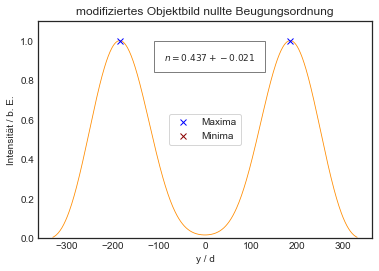

In [29]:
#Plot der bereits zuvor programmierten Doppelspaltfunktion mit passendem n.

maxPos_dspalt0, maxInt_dspalt0, minPos_dspalt0, minInt_dspalt0 = picture(doppelspalt, n_max_a, 'nullte Beugungsordnung')
plt.text(-90,0.9,'$n = 0.437 +- 0.021$',bbox={'facecolor':'white', 'alpha':0.5, 'pad':10},size=9)
plt.savefig(r'C:\Users\Quirinus\Documents\GitHub\Praktikum\Praktikum\233 - Fourieroptik\Diagramme\nullte Beugungsordnung.pdf', format='PDF')

### Fall b) iterative Bestimmung von k_y

In [30]:
# Doppelspalt
def doppelspalt(k):
    return d/np.pi*np.cos(k*g/2) *np.sin(k*d/2)/(k*d/2)*np.cos(y*k)
d=1
g=prob_gd*d
x1 = [1,2]
k_y = 2*np.pi*1/g
Y = np.linspace(-d,d,501)
#k_y stets verkleinern und Maxima zählen. Wenn nur noch ein Maximum da ist, dann k_y ausgeben
while len(x1)>1:
    k_y=k_y-0.001
    f_modifiziert=[]
    for i in range(len(Y)):
        y=Y[i]
        result, error = quad(doppelspalt, 0, k_y)
        f_modifiziert.append(result**2)
    C =np.max(f_modifiziert)
    f_modifiziert/=C
    max_mask = np.r_[f_modifiziert[1:] < f_modifiziert[:-1], True] & np.r_[True,f_modifiziert[:-1] < f_modifiziert[1:]];
    x1=Y[np.where(max_mask)]
print(k_y)

1.8371112765128088


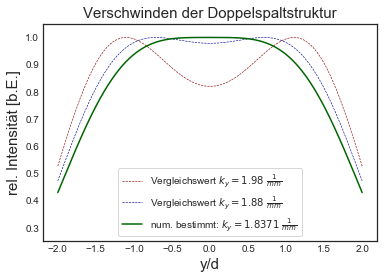

In [31]:
#numerisch berechnet, Berechung recht aufwendig bei gewählter Schrittweite
#bei anderen Werten einfach vorheriges Codefeld ausführen

k_y=1.8371
#Vergleichswerte
k_y2=1.88
k_y3=1.98

Y = np.linspace(-2,2,10001)*d

#für dieses k_y und zwei Vergleichswerte das Objektbild plotten
f_modifiziert=[]
for i in range(len(Y)):
    y=Y[i]
    result, error = quad(doppelspalt, 0, k_y)
    f_modifiziert.append(result**2)
C =np.max(f_modifiziert)
f_modifiziert/=C

f_modifiziert2=[]
for i in range(len(Y)):
    y=Y[i]
    result, error = quad(doppelspalt, 0, k_y2)
    f_modifiziert2.append(result**2)
C =np.max(f_modifiziert2)
f_modifiziert2/=C

f_modifiziert3=[]
for i in range(len(Y)):
    y=Y[i]
    result, error = quad(doppelspalt, 0, k_y3)
    f_modifiziert3.append(result**2)
C =np.max(f_modifiziert3)
f_modifiziert3/=C

plt.plot(Y, f_modifiziert3,color='darkred',linestyle='--',linewidth=0.6,label=r'Vergleichswert $k_y=1.98 \ \frac{1}{mm}$')
plt.plot(Y, f_modifiziert2,color='darkblue',linestyle='--',linewidth=0.6,label=r'Vergleichswert $k_y=1.88 \ \frac{1}{mm}$')
plt.plot(Y, f_modifiziert,color='darkgreen',label=r'num. bestimmt: $k_y=1.8371 \ \frac{1}{mm}$')
plt.title('Verschwinden der Doppelspaltstruktur',size=15)
plt.xlabel('y/d',size=15)
plt.ylabel('rel. Intensität [b.E.]', size=15)
plt.ylim(0.25,1.05)
plt.legend(frameon=True)
plt.savefig(r'C:\Users\Quirinus\Documents\GitHub\Praktikum\Praktikum\233 - Fourieroptik\Diagramme\Verschwindender Doppelspalt.pdf',format='PDF')

In [32]:
ky_exp=np.pi*0.06e-3/(wavelength*f1)*1e-3
ky_exp_err=ky_exp*(0.02/0.06)

print('Das experimentelle Ergebnis berechnet sich zu:')
print('k_y = '+ str(ky_exp)+' +/- '+ str(ky_exp_err)+ ' 1/mm')

Das experimentelle Ergebnis berechnet sich zu:
k_y = 3.7105425042399136 +/- 1.2368475014133047 1/mm


In [34]:
#für Fall a)
d_a=0.38e-3
d_a_err=0.02e-3

ky_theo_a = 2*np.pi*n_max_a/1
ky_theo_a_err = ky_theo_a *np.sqrt((n_max_a_err/n_max_a))**2
print(ky_theo_a, ky_theo_a_err)

ky_exp_a=np.pi*d_a/(wavelength*f1)*1e-3
ky_exp_a_err=ky_exp_a*np.sqrt((0.02/0.06)**2)
print(ky_exp_a,ky_exp_a_err)

2.747111276512708 0.134900398252
23.500102526852785 7.83336750895
